In [1]:
import seaborn as sns
import geopandas as gpd
import contextily as cx
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read area of interest (AOI) to keep processing to a limited area for now
aoi_fpath = r'C:/Users/hseely/Downloads/cutblocks_aoi.gpkg'
aoi = gpd.read_file(aoi_fpath)

cutblocks_fpath = r'C:/Users/hseely/Downloads/cutblocks_dem.gpkg'
cutblocks = (gpd.read_file(cutblocks_fpath) # Reduce cutblocks to the AOI
             .rename(columns={'HRVST_MD_R': 'harvest_year'}))



# Set DEM fpath
dem_fpath = r'C:/Users/hseely/Downloads/cutblocks_dem.tif'

Text(0.5, 1.0, 'Area of Interest (AOI)')

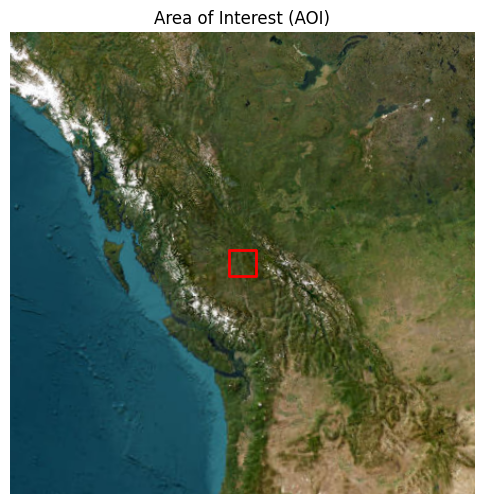

In [ ]:
# Visualize AOI location

aoi_buf = aoi.copy()
aoi_buf.geometry = aoi_buf.geometry.buffer(1_000_000, cap_style='square')

fig, ax = plt.subplots(figsize=(6, 6))
aoi_buf.plot(ax=ax, facecolor='none', edgecolor='none')
aoi.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery,
                attribution="", crs=aoi.crs)
plt.title('Area of Interest (AOI)')

In [4]:
# Number of cutblocks in larger dataset extent
print(len(cutblocks))

33387


<Axes: xlabel='harvest_year', ylabel='Count'>

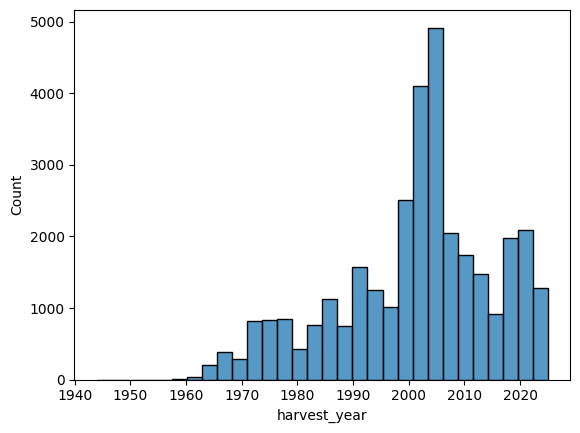

In [5]:
sns.histplot(cutblocks['harvest_year'], bins=30)

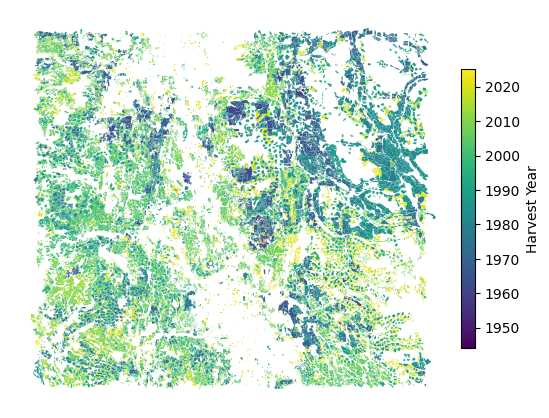

In [6]:
# Visualize cutblocks by year
fig, ax = plt.subplots(figsize=(6, 6))
cutblocks.plot(ax=ax, column='harvest_year')
ax.set_axis_off()
plt.colorbar(ax.collections[0], ax=ax, label='Harvest Year', fraction=0.03, pad=0.01)

In [7]:
# Load the DEM and visualize

with rasterio.open(dem_fpath) as dem_src:
    dem = dem_src.read(1)
    nodata_value = dem_src.nodata
    dem = dem.astype('float16')
    dem[dem == nodata_value] = np.nan
    dem_transform = dem_src.transform

    dem_crs = dem_src.crs
    assert dem_crs == cutblocks.crs, "CRS of DEM and cutblocks do not match!"



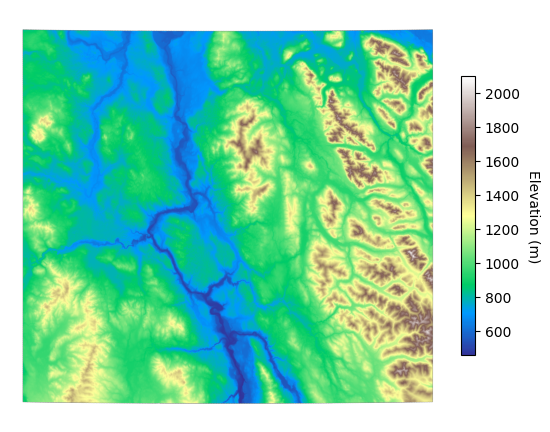

In [8]:
# Set colourmap
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(dem, cmap='terrain')
ax.set_axis_off()

cbar = plt.colorbar(ax.images[0], ax=ax, fraction=0.03, pad=0.01)
cbar.set_label('Elevation (m)', rotation=270, labelpad=15)